<a href="https://colab.research.google.com/github/tcarlon94/Ultimate_Inc_study/blob/main/Ulimate_challenge_logins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ultimate Technologies Inc. Take Home Challenge Exercise

# EDA

Aggregate & visualize logins by 15 min intervals & visualize time series of login counts to show patterns in demand

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load & Explore Data

In [2]:
# Load data
file_name = 'logins.json'
data = pd.read_json(file_name)

In [3]:
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
data.describe()

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


Looks like our data spans from Jan 1 to April 13 in 1970. The only thing included in the data is the datetime values. There are no null values

# Aggregate data into 15 min intervals

In [6]:
# Get login counts based on 15 min time intervals
data_15min = data.groupby([pd.Grouper(key='login_time', freq='15T')]).value_counts().reset_index()
data_15min.head()

/tmp/ipython-input-6-3047532707.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_15min = data.groupby([pd.Grouper(key='login_time', freq='15T')]).value_counts().reset_index()


,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


# Visualize Patterns

## Visualize by daily cycles

We'll separate the HH/MM/SS and date to examine the daily *cycle*

In [7]:
# Separate date & time
data_15min['date'] = data_15min['login_time'].dt.date
data_15min['time'] = data_15min['login_time'].dt.time
data_15min.head()

,login_time,count,date,time
0,1970-01-01 20:00:00,2,1970-01-01,20:00:00
1,1970-01-01 20:15:00,6,1970-01-01,20:15:00
2,1970-01-01 20:30:00,9,1970-01-01,20:30:00
3,1970-01-01 20:45:00,7,1970-01-01,20:45:00
4,1970-01-01 21:00:00,1,1970-01-01,21:00:00


First, we'll analyze the total values for each 15 min increment

In [8]:
# Analyze by total count per 15 min increment
data_15min_total = data_15min.groupby(['time'])['count'].sum().reset_index()
data_15min_total.head()

,time,count
0,00:00:00,1439
1,00:15:00,1547
2,00:30:00,1525
3,00:45:00,1482
4,01:00:00,1549


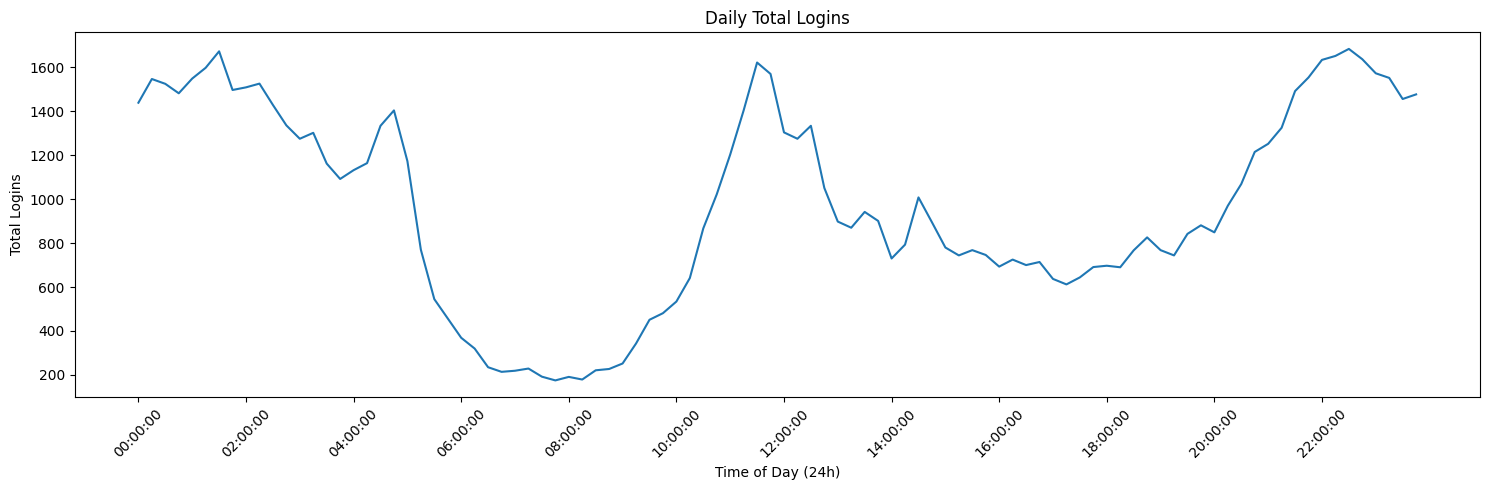

In [13]:
# Visualize daily total data
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=data_15min_total, x=data_15min_total['time'].astype(str), y='count')

ax.set_xlabel('Time of Day (24h)')
ax.set_ylabel('Total Logins')
ax.set_title('Daily Total Logins')
# Create variable for X ticks
x_ticks = ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00', '18:00:00', '20:00:00', '22:00:00']
plt.xticks(x_ticks, rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

We can see that the login counts are high in the overnight hours (midnight to about 3) and dip significantly in the hours that people are waking up and commuting (5:30 to 10) and starting their work day.

Demand spikes again around lunch time then slightly dips in the afternoon to early evening hours before peaking again late night

In [17]:
# Look at raw numbers of logins
data_15min_total.sort_values(by='count', ascending=False).head(10)

,time,count
90,22:30:00,1684
6,01:30:00,1673
89,22:15:00,1652
91,22:45:00,1637
88,22:00:00,1634
46,11:30:00,1622
5,01:15:00,1598
92,23:00:00,1573
47,11:45:00,1570
87,21:45:00,1554


The highest login counts are toward the middle of the night at 10:30 pm and 1:30 am. 4 of the top 5 highest login times are in the hour from 10-11 pm.

# Day of week analysis

Now I'll also analyze how the logins change by the day of the week

In [18]:
# Add day of week column
data_15min['day_of_week'] = data_15min['login_time'].dt.day_name()
data_15min.head()

,login_time,count,date,time,day_of_week
0,1970-01-01 20:00:00,2,1970-01-01,20:00:00,Thursday
1,1970-01-01 20:15:00,6,1970-01-01,20:15:00,Thursday
2,1970-01-01 20:30:00,9,1970-01-01,20:30:00,Thursday
3,1970-01-01 20:45:00,7,1970-01-01,20:45:00,Thursday
4,1970-01-01 21:00:00,1,1970-01-01,21:00:00,Thursday


In [20]:
# Group by day of week
data_15min_week = data_15min.groupby(['day_of_week'])['count'].sum().reset_index()
data_15min_week

,day_of_week,count
0,Friday,15208
1,Monday,8823
2,Saturday,19377
3,Sunday,18167
4,Thursday,11960
5,Tuesday,9268
6,Wednesday,10339


In [21]:
# Order days Sun-Sat
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
data_15min_week['day_of_week'] = pd.Categorical(data_15min_week['day_of_week'], categories=days, ordered=True)
data_15min_week = data_15min_week.sort_values('day_of_week')
data_15min_week

,day_of_week,count
3,Sunday,18167
1,Monday,8823
5,Tuesday,9268
6,Wednesday,10339
4,Thursday,11960
0,Friday,15208
2,Saturday,19377


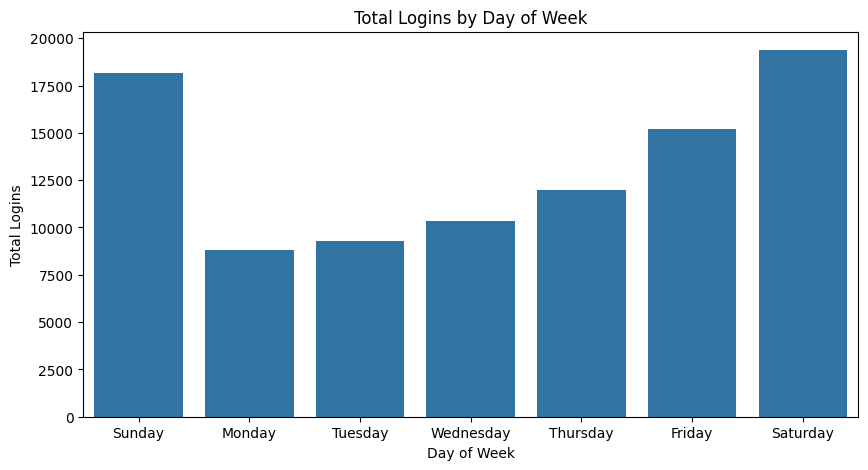

In [22]:
# Visualize day of week logins
plt.figure(figsize=(10,5))
sns.barplot(data=data_15min_week, x='day_of_week', y='count')
plt.xlabel('Day of Week')
plt.ylabel('Total Logins')
plt.title('Total Logins by Day of Week')
plt.show()

We can see that the weekends drive the most demand, led by Saturday and Sunday. Monday has the least demand and it gradually increases to peak at Saturday.

We can also look at this to see what times of day are most popular for each day of the week. First we'll split the hours into Overnight/Morning (before 8 am), during work hours (8 am - 4 pm), and After work hours (4 to midnight).

In [24]:
# Separate into time of day
data_15min['time_of_day'] = np.where(data_15min['login_time'].dt.hour < 8, 'Overnight',
                                     np.where(data_15min['login_time'].dt.hour < 16, 'Daytime',
                                    'After Work'))
data_15min.head(25)

,login_time,count,date,time,day_of_week,time_of_day
0,1970-01-01 20:00:00,2,1970-01-01,20:00:00,Thursday,After Work
1,1970-01-01 20:15:00,6,1970-01-01,20:15:00,Thursday,After Work
2,1970-01-01 20:30:00,9,1970-01-01,20:30:00,Thursday,After Work
3,1970-01-01 20:45:00,7,1970-01-01,20:45:00,Thursday,After Work
4,1970-01-01 21:00:00,1,1970-01-01,21:00:00,Thursday,After Work
5,1970-01-01 21:15:00,4,1970-01-01,21:15:00,Thursday,After Work
6,1970-01-01 21:30:00,0,1970-01-01,21:30:00,Thursday,After Work
7,1970-01-01 21:45:00,4,1970-01-01,21:45:00,Thursday,After Work
8,1970-01-01 22:00:00,9,1970-01-01,22:00:00,Thursday,After Work
9,1970-01-01 22:15:00,8,1970-01-01,22:15:00,Thursday,After Work


In [25]:
# Group by day of week and time of day
data_15min_week_time = data_15min.groupby(['day_of_week', 'time_of_day'])['count'].sum().reset_index()
data_15min_week_time

,day_of_week,time_of_day,count
0,Friday,After Work,6913
1,Friday,Daytime,4266
2,Friday,Overnight,4029
3,Monday,After Work,3140
4,Monday,Daytime,3686
5,Monday,Overnight,1997
6,Saturday,After Work,6425
7,Saturday,Daytime,3556
8,Saturday,Overnight,9396
9,Sunday,After Work,5002


In [28]:
# Sort values by weekday before plotting
data_15min_week_time['day_of_week'] = pd.Categorical(data_15min_week_time['day_of_week'], categories=days, ordered=True)
data_15min_week_time = data_15min_week_time.sort_values('day_of_week')

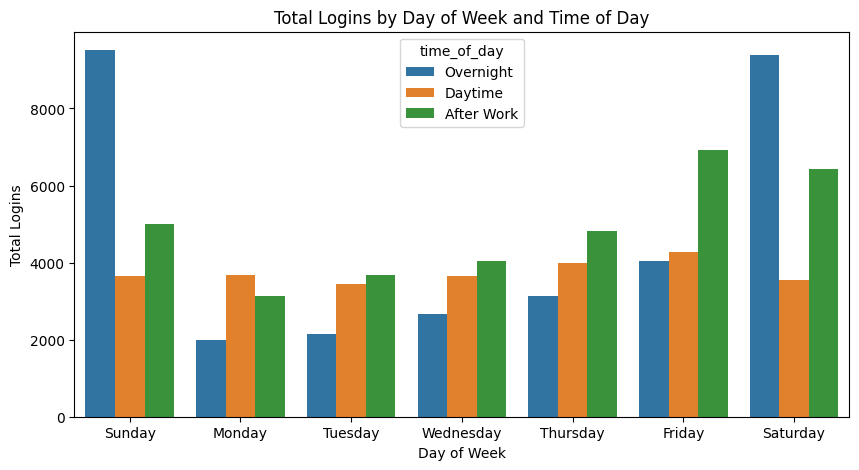

In [30]:
# Visualize weekday and time of day plot
plt.figure(figsize=(10,5))
sns.barplot(data=data_15min_week_time,
            x='day_of_week',
            y='count',
            hue='time_of_day',
            hue_order=['Overnight', 'Daytime', 'After Work'])
plt.xlabel('Day of Week')
plt.ylabel('Total Logins')
plt.title('Total Logins by Day of Week and Time of Day')
plt.show()

We can see here that overnight hours (before 8 am) drive the highest demand on weekends but the lowest demand during the weekdays.

After work hours (4 pm to midnight) drive most demand on Friday and high demand on Saturday/Sunday. It increases gradually throughout the week.

Daytime hours (8 am - 4 pm) are generally pretty consistent every day at about 4000 logins per day.

# Conclusion

In conclusion, the hour with highest demand is between 10 and 11 pm. The highest demand portions are between about 9 pm to 5 am and around lunch time (12 pm).

The time with lowest demand is in the morning hours between 5:30 and 10 am.

The times of highest demand can also vary by weekday. We see higher demand on the weekends, especially overnight. Weekday overnight demand is much lower. After work demand peaks on Friday and gradually increases throughout the week.